In [2]:
from modules.validator import Validator
from modules.eda_class_native import run_eda, standardize_runs_df, df_runid_summary #, Validator
from modules.constants_settings import ConstantsSettings as CS
import pandas as pd
from modules.data_import import infer_source_files_technology, read_references_filter

In [3]:

METADATA_DIR = "benchmark_metadata/"
INTERMEDIATE_OUTPUT_DIR= "analysis_data/"
OUTPUT_DIR = "output/"
INPUT_DIR = "benchmark_data/"
technology= CS.TECHNOLOGY_minion # options minion, illumina


In [4]:

all_reports_file, all_parameters_file, all_references_file, validation_file= infer_source_files_technology(technology, INPUT_DIR, METADATA_DIR)
raw_refs= read_references_filter(all_references_file, benchmark_prefix="benchmark_batch")

## validation data
validator = Validator(validation_file, raw_refs)


### summary data
eda_runs = run_eda(validator, all_reports_file, all_parameters_file, 
                   INTERMEDIATE_OUTPUT_DIR)


### pre-processing
eda_runs.split()
eda_runs.combine_data()

full_data = eda_runs.combdat
dataset_success = eda_runs.get_combd_data_success()
sources = eda_runs.sources

combdat_full_process = standardize_runs_df(eda_runs.combdat) ##
run_assess = df_runid_summary(combdat_full_process, INTERMEDIATE_OUTPUT_DIR, technology=technology)


/home/bioinf/Desktop/INSA/Manuscript/Manuscript_TELEVIR/BENCHMARK_EDA/modules/eda_class_native.py:607: DtypeWarning: Columns (46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  combdat = pd.read_csv(self.combined_reports_path, sep="\t")


In [5]:

#####
### generate benchmark tree, calculate scores
from modules.benchmark_graph_utils import pipeline_tree, tree_plot

pipe_tree = pipeline_tree(INTERMEDIATE_OUTPUT_DIR)
pipe_tree.param_input(technology)
pipe_tree.create_pipe_tree()

inter_scores= pipe_tree.calculate_node_scores_with_source_subset_draw(
    eda_runs.softs, run_assess, cv= 100, subset=.7)



node_runs_df (2574, 2)


## Workflow Comparison

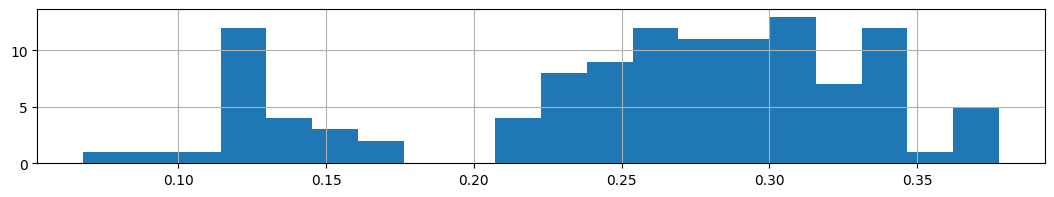

compressing tree


In [6]:
from  modules.analysis_functions import plot_benchmark_tree, plot_workflow_boxplots
import numpy as np

internode_function=np.mean
stats=["precision", "coverage"]

plot_benchmark_tree(pipe_tree, internode_function=internode_function, stats=stats)

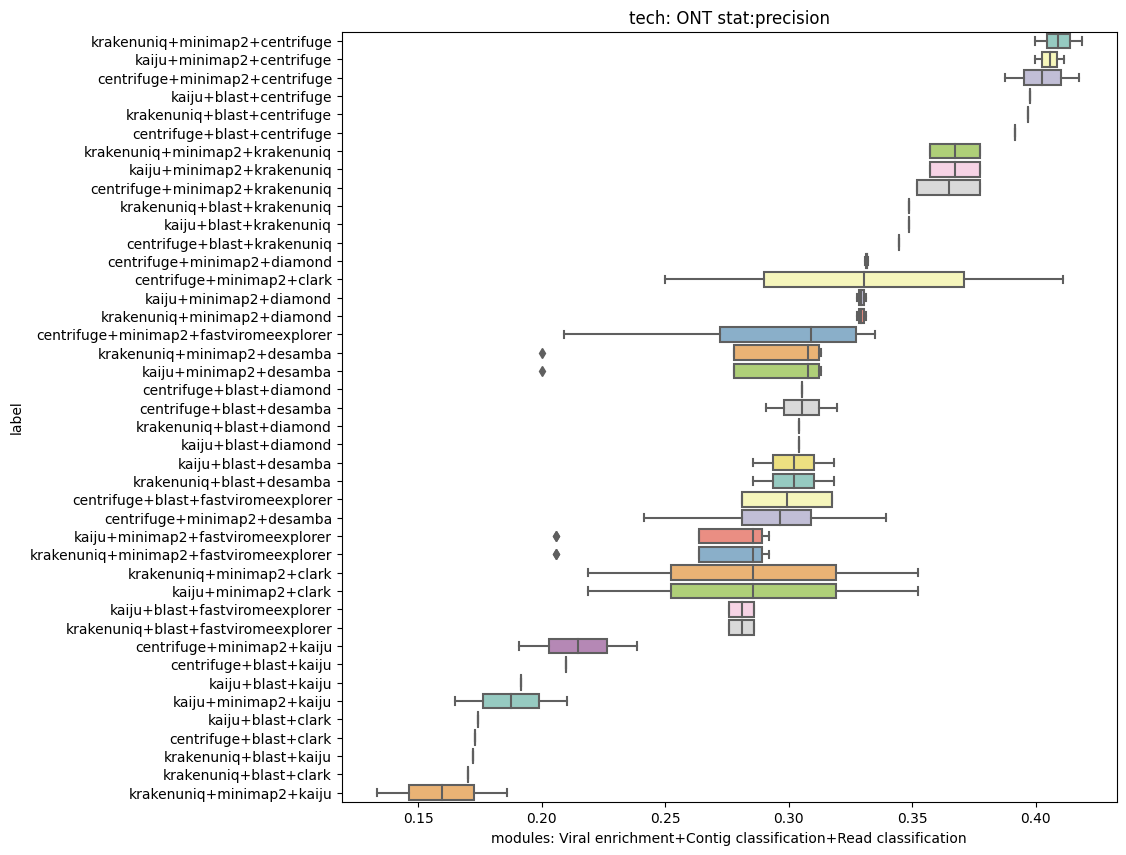

In [12]:
select_modules_dict= {
    CS.PIPELINE_NAME_viral_enrichment: ["kaiju", "centrifuge", "krakenuniq"],
    CS.PIPELINE_NAME_contig_classification: ["blast", "minimap2"],
    CS.PIPELINE_NAME_read_classification: ["kaiju", "centrifuge", "krakenuniq", "diamond", "desamba", "clark", "fastviromeexplorer"],
}

plot_workflow_boxplots(pipe_tree, stats= stats, select_modules_dict= select_modules_dict)

